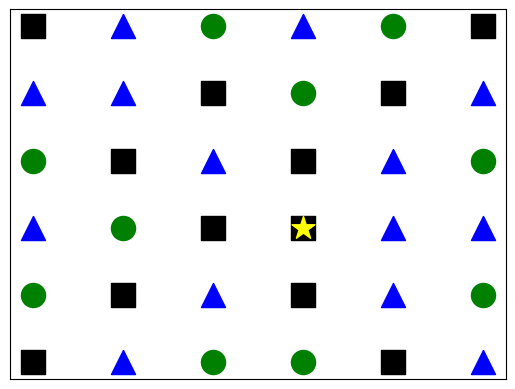

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

numberToLetter = {1:'C',2:'Q',3:'T',4:'E'}
G = nx.DiGraph()
MATRIZ = [  #Assumir 1=Círculo, 2=Quadrado, 3=Triangulo, 4=Estrela
    [2,3,1,3,1,2],
    [3,3,2,1,2,3],
    [1,2,3,2,3,1],
    [3,1,2,4,3,3],
    [1,2,3,2,3,1],
    [2,3,1,1,2,3]
]

linhas = len(MATRIZ)
colunas = len(MATRIZ[0])

for i in range(linhas):
    for j in range(colunas):
        G.add_node((i, j), shape=MATRIZ[i][j])

minhapos = {
    (i, j): (j, -i) for i in range(linhas) for j in range(colunas)
}
estrela = {
    (i, j): (3, -3)
}
formas = {
    1: ('o', 'green'),    # círculo
    2: ('s', 'black'),    # quadrado
    3: ('^', 'blue'),     # triângulo
    4: ('s', 'black')    # estrela
}

for node in G.nodes():
    shape, color = formas[G.nodes[node]['shape']]
    nx.draw_networkx_nodes(G, pos=minhapos, nodelist=[node], node_color=color, node_shape=shape)
nx.draw_networkx_nodes(G, pos=estrela, nodelist=[node], node_color='yellow', node_shape='*')
plt.show()


Tamanho: 4x4
[3, 1, 3, 2]
[2, 3, 2, 3]
[1, 3, 2, 1]
[2, 1, 2, 2]


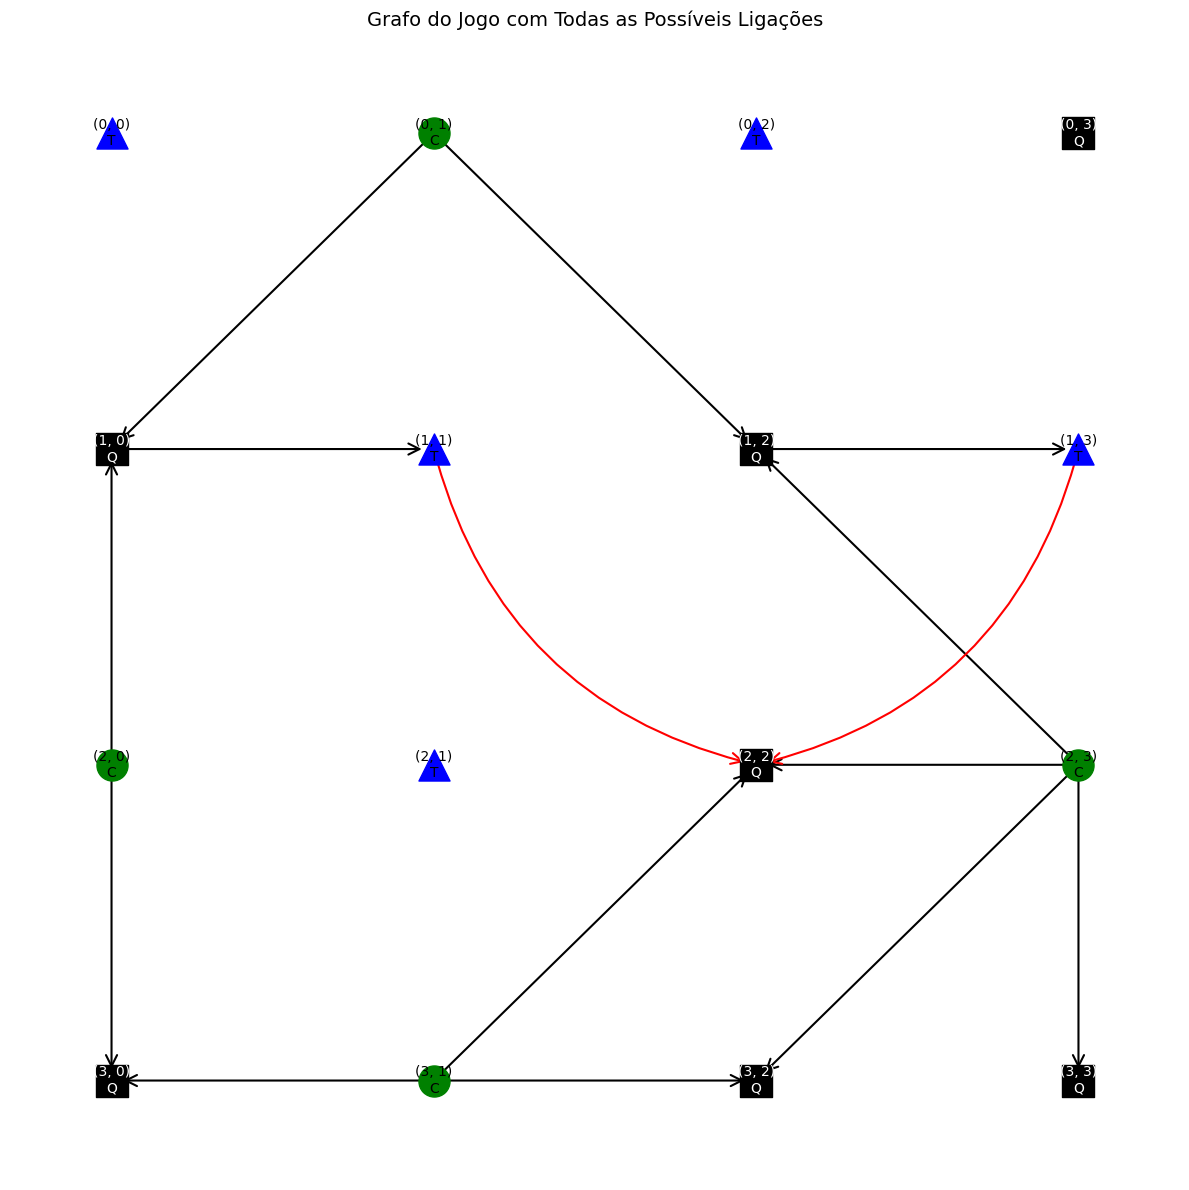

In [28]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

numberToLetter = {1: 'C', 2: 'Q', 3: 'T'}
G = nx.DiGraph()
# MATRIZ = [  # 1=Círculo, 2=Quadrado, 3=Triângulo, 4=Estrela
#     [2, 3, 1, 3, 1, 2],
#     [3, 3, 2, 1, 2, 3],
#     [1, 2, 3, 2, 3, 1],
#     [3, 2, 2, 2, 3, 3],
#     [1, 2, 3, 2, 3, 1],
#     [2, 3, 1, 1, 2, 3]
# ]


def gerar_matriz_aleatoria(min_tam=9, max_tam=100):
    """
    Gera uma matriz quadrada n x n com valores aleatórios entre 1 e 4.
    n é escolhido aleatoriamente entre min_tam e max_tam.

    :param min_tam: tamanho mínimo da matriz (default 2)
    :param max_tam: tamanho máximo da matriz (default 6)
    :return: matriz aleatória e o valor de n
    """
    n = random.randint(min_tam, max_tam)  # Define tamanho n x n
    j = random.randint(min_tam, max_tam)  # Define tamanho n x n
    matriz = [[random.randint(1, 3) for _ in range(n)] for _ in range(j)]
    return matriz, n

MATRIZ, tamanho = gerar_matriz_aleatoria(2, 6)

print(f"Tamanho: {tamanho}x{tamanho}")
for linha in MATRIZ:
    print(linha)


linhas = len(MATRIZ)
colunas = len(MATRIZ[0])

# Adiciona nós com seus tipos
for i in range(linhas):
    for j in range(colunas):
        G.add_node((i, j), shape=MATRIZ[i][j])

# Função para encontrar TODOS os quadrados mais próximos (adjacentes ortogonais e diagonais imediatas)
def encontrar_quadrados_proximos(i, j):
    direcoes = [(-1, 0), (1, 0), (0, -1), (0, 1),
                (-1, -1), (-1, 1), (1, -1), (1, 1)]
    quadrados = []
    for di, dj in direcoes:
        ni, nj = i + di, j + dj
        if 0 <= ni < linhas and 0 <= nj < colunas:
            if MATRIZ[ni][nj] == 2:  # Quadrado
                quadrados.append((ni, nj))
    return quadrados

# Função para encontrar TODOS os triângulos à direita ou abaixo
def encontrar_triangulos_proximos(i, j):
    direcoes = [(0, 1), (1, 0)]  # Direita e abaixo
    triangulos = []
    for di, dj in direcoes:
        ni, nj = i + di, j + dj
        if 0 <= ni < linhas and 0 <= nj < colunas:
            if MATRIZ[ni][nj] == 3:  # Triângulo
                triangulos.append((ni, nj))
    return triangulos

# Função para encontrar TODOS os quadrados diagonais mais próximos (distância mínima)
def encontrar_quadrados_diagonais(i, j):
    direcoes = [(-1, -1), (-1, 1), (1, -1), (1, 1)]  # Diagonais
    encontrados = []

    for di, dj in direcoes:
        distancia = 1
        while True:
            ni, nj = i + distancia * di, j + distancia * dj
            if 0 <= ni < linhas and 0 <= nj < colunas:
                if MATRIZ[ni][nj] == 2:  # Encontrou quadrado
                    encontrados.append(((ni, nj), distancia))
                    break  # Para nessa direção, mas continua nas outras
            else:
                break  # Sai quando passa do limite da matriz
            distancia += 1

    if not encontrados:
        return []

    # Pega a menor distância
    menor_dist = min(dist for _, dist in encontrados)

    # Retorna apenas os quadrados com a menor distância
    return [pos for pos, dist in encontrados if dist == menor_dist]



# Adiciona TODAS as arestas possíveis seguindo as regras
for i in range(linhas):
    for j in range(colunas):
        if MATRIZ[i][j] == 1:  # Círculo
            # Passo 1: Ir para TODOS os quadrados próximos
            for quadrado in encontrar_quadrados_proximos(i, j):
                G.add_edge((i, j), quadrado)

                # Passo 2: Para cada quadrado, ir para TODOS os triângulos próximos
                for triangulo in encontrar_triangulos_proximos(quadrado[0], quadrado[1]):
                    G.add_edge(quadrado, triangulo)

                    # Passo 3: Para cada triângulo, ir para TODOS os quadrados diagonais
                    for quadrado_diag in encontrar_quadrados_diagonais(triangulo[0], triangulo[1]):
                        G.add_edge(triangulo, quadrado_diag)


# Posicionamento dos nós em grade
pos = {
    (i, j): (j, -i) for i in range(linhas) for j in range(colunas)
}

# Encontrar a estrela (vértice final)
estrela_pos = None
for i in range(linhas):
    for j in range(colunas):
        if MATRIZ[i][j] == 4:
            estrela_pos = (i, j)
            break
    if estrela_pos:
        break

# --- Desenhar o grafo ---
plt.figure(figsize=(12, 12))

# Formas e cores dos nós
formas = {
    1: ('o', 'green'),    # círculo
    2: ('s', 'black'),    # quadrado
    3: ('^', 'blue'),     # triângulo
    4: ('*', 'yellow')    # estrela
}

# Desenhar nós
for node in G.nodes():
    shape_type = G.nodes[node]['shape']
    shape, color = formas[shape_type]
    nx.draw_networkx_nodes(
        G, pos, nodelist=[node],
        node_color=color,
        node_shape=shape,
        node_size=500
    )

    # Rótulos com coordenadas e tipo
    plt.text(
        pos[node][0], pos[node][1],
        f"{node}\n{numberToLetter[shape_type]}",
        ha='center', va='center',
        color='white' if color == 'black' else 'black'
    )

# --- Separar arestas normais e diagonais ---
edges_normais = []
edges_diagonais = []
curvaturas = {}

for u, v in G.edges():
    # Se for triângulo -> quadrado em diagonal
    if MATRIZ[u[0]][u[1]] == 3 and MATRIZ[v[0]][v[1]] == 2 and abs(u[0] - v[0]) == abs(u[1] - v[1]):
        edges_diagonais.append((u, v))

        # Descobre a direção da diagonal
        di = v[0] - u[0]
        dj = v[1] - u[1]

        if (di > 0 and dj > 0) or (di < 0 and dj < 0):  # ↘ ou ↖
            curvaturas[(u, v)] = 0.3
        else:  # ↗ ou ↙
            curvaturas[(u, v)] = -0.3
    else:
        edges_normais.append((u, v))

# Arestas normais (reta)
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges_normais,
    arrowstyle='->',
    arrowsize=20,
    width=1.5,
    connectionstyle="arc3,rad=0.0"
)

# Arestas diagonais (curvadas em sentidos opostos)
for (u, v) in edges_diagonais:
    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        arrowstyle='->',
        arrowsize=20,
        width=1.5,
        edge_color="red",  # destacar diagonais
        connectionstyle=f"arc3,rad={curvaturas[(u, v)]}"
    )

# Ajustes finais
plt.axis('off')
plt.title("Grafo do Jogo com Todas as Possíveis Ligações", fontsize=14)
plt.tight_layout()
plt.show()
